In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotly.express as px

In [4]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df = df.drop(columns = ['BusinessTravel', 'Over18','DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'HourlyRate'])

In [7]:
#The columns we're going to work on
df.columns

Index(['Age', 'Attrition', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
df = df.drop(columns = ['StandardHours'])

In [9]:
#Plotting agewise attrition
df_age = df.loc[:,['Age','Attrition']]
df_age_graph = df_age.pivot_table(index = 'Age', columns=['Attrition'], aggfunc = len)
df_age_graph.head(5)

Attrition,No,Yes
Age,,
18,4.0,4.0
19,3.0,6.0
20,5.0,6.0
21,7.0,6.0
22,11.0,5.0


<AxesSubplot:xlabel='Age', ylabel='count'>

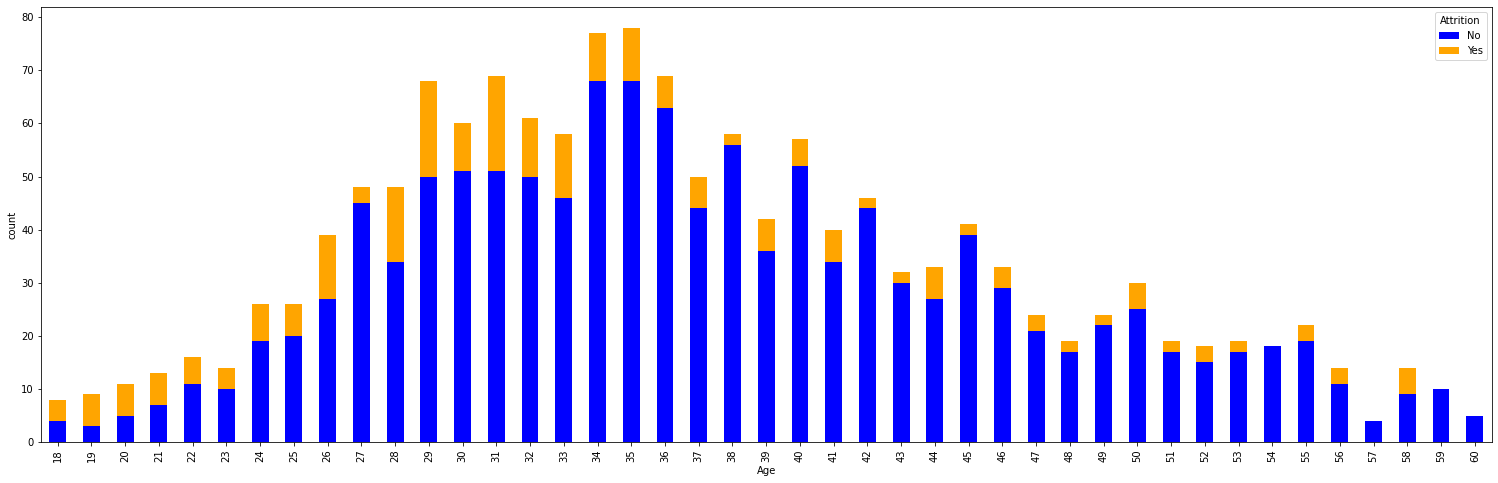

In [10]:
df_age_graph.plot(kind = 'bar', stacked = True, color = ['blue','orange'], figsize = (26,8), ylabel = 'count')

<AxesSubplot:xlabel='Department', ylabel='count'>

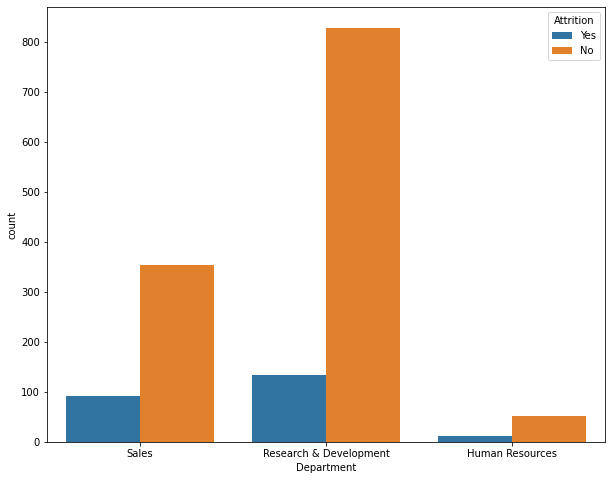

In [11]:
#Plotting Departmentwise attrition
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = 'Department', hue = 'Attrition')

<AxesSubplot:xlabel='Education', ylabel='count'>

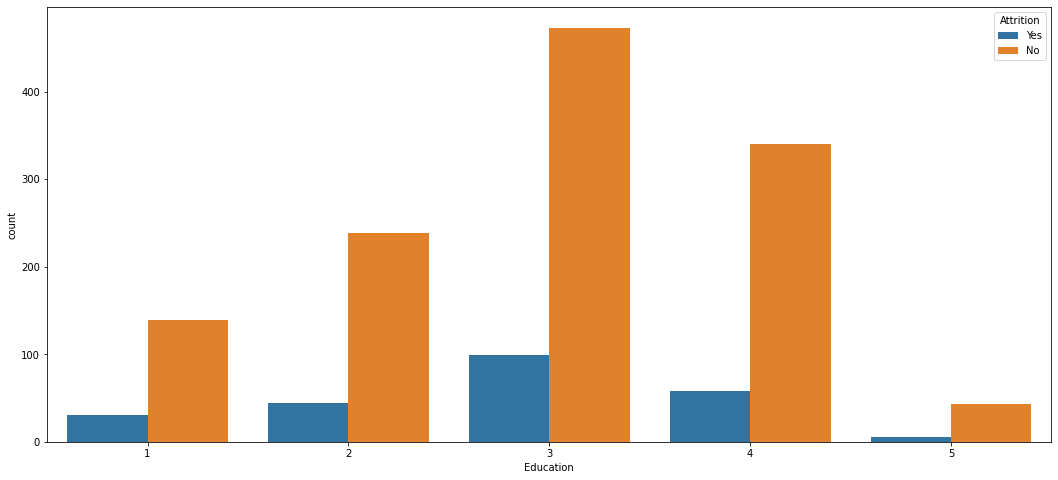

In [12]:
#Plotting attrition based on education
plt.figure(figsize=(18,8))
sns.countplot(data = df, x = 'Education', hue = 'Attrition')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

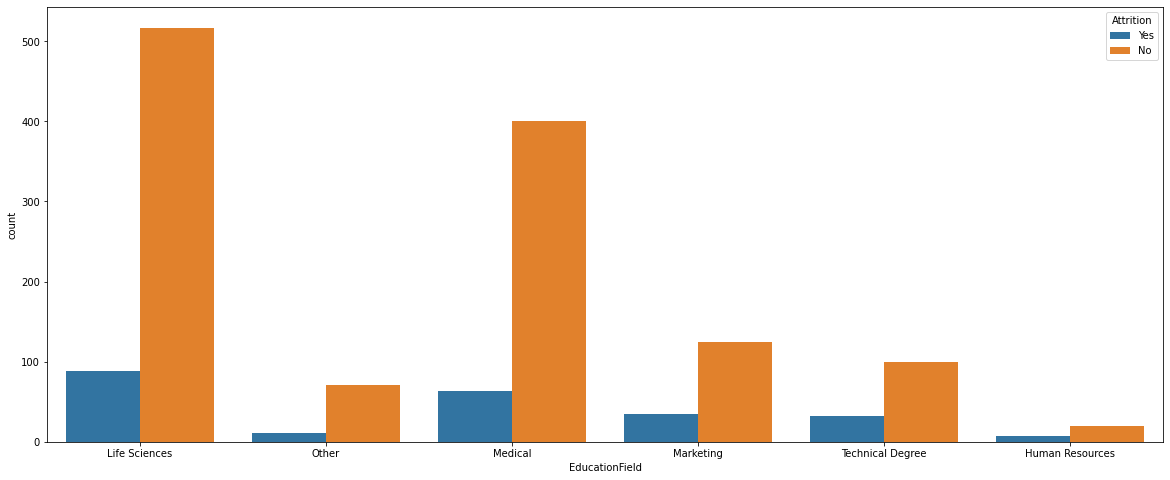

In [13]:
#Attrition based on EducationField
plt.figure(figsize=(20,8))
sns.countplot(data = df, x = 'EducationField', hue = 'Attrition')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

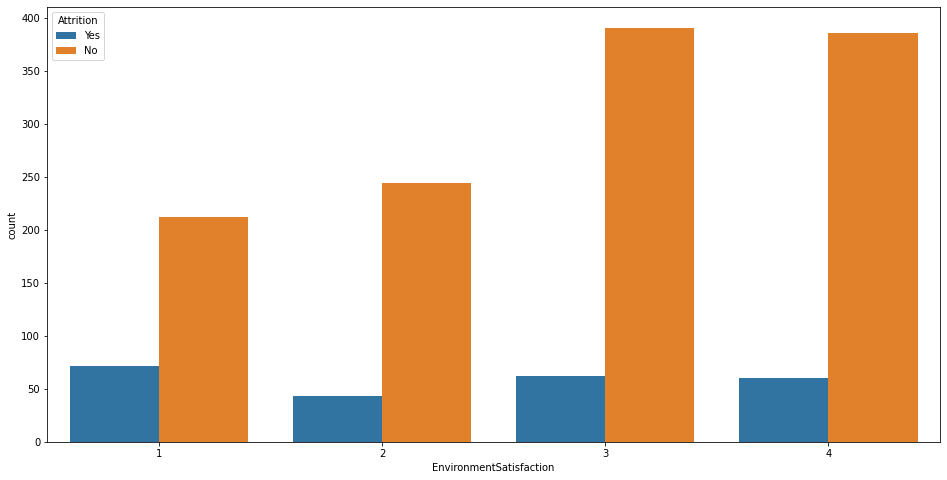

In [14]:
#Attrition based on EnvironmentSatisfaction
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = 'EnvironmentSatisfaction', hue = 'Attrition')

<AxesSubplot:xlabel='Gender', ylabel='count'>

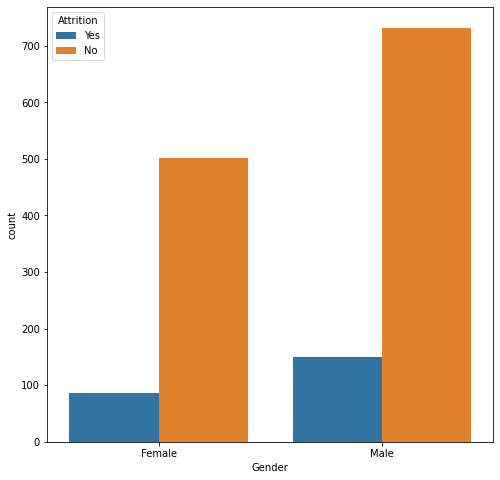

In [15]:
#Genderbased Attrition
plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'Gender', hue = 'Attrition')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

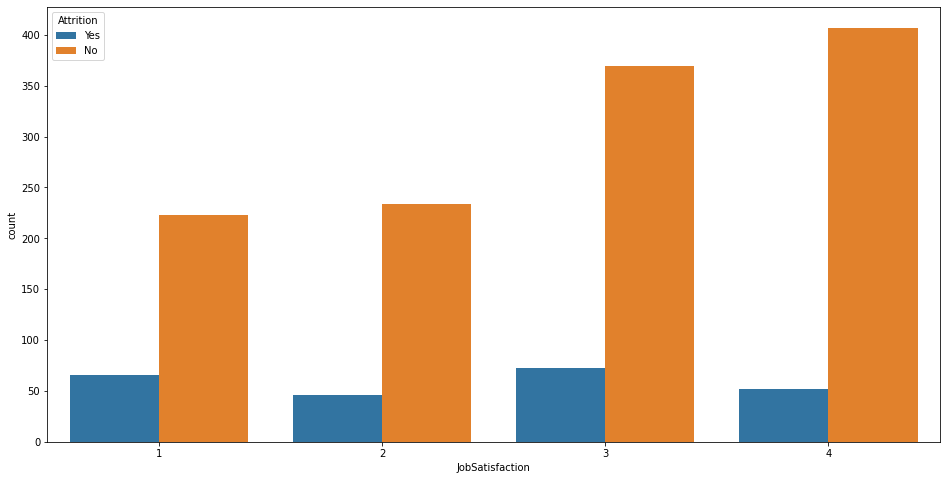

In [16]:
#Attrition based on JobSatisfaction
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = 'JobSatisfaction', hue = 'Attrition')

In [17]:
#NumCompaniesWorked based attrition
df_numc = df.loc[:,['NumCompaniesWorked','Attrition']]
df_numc_graph = df_numc.pivot_table(index = 'NumCompaniesWorked', columns=['Attrition'], aggfunc = len)
df_numc_graph.head(5)

Attrition,No,Yes
NumCompaniesWorked,,
0,174,23
1,423,98
2,130,16
3,143,16
4,122,17


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

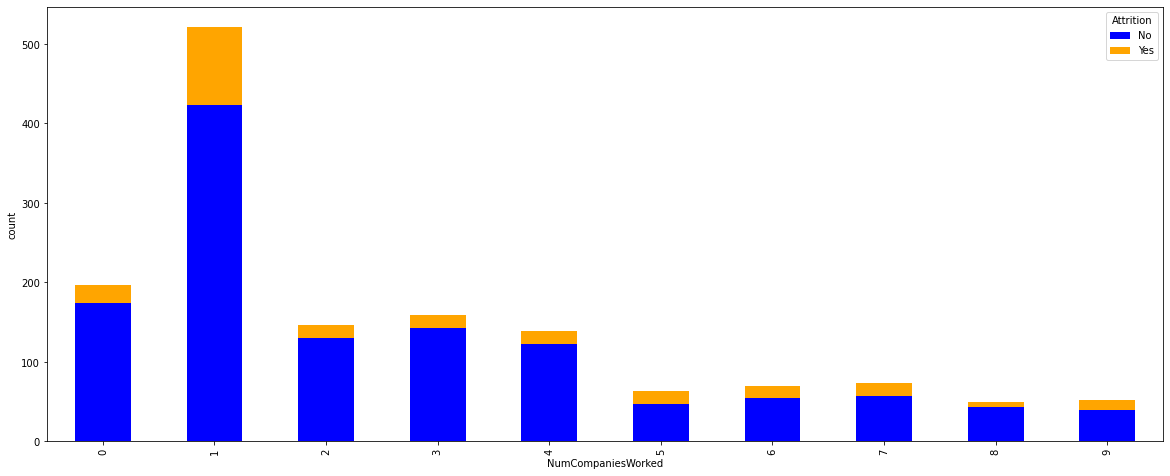

In [18]:
df_numc_graph.plot(kind = 'bar', stacked = True, color = ['blue','orange'], figsize = (20,8), ylabel = 'count')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

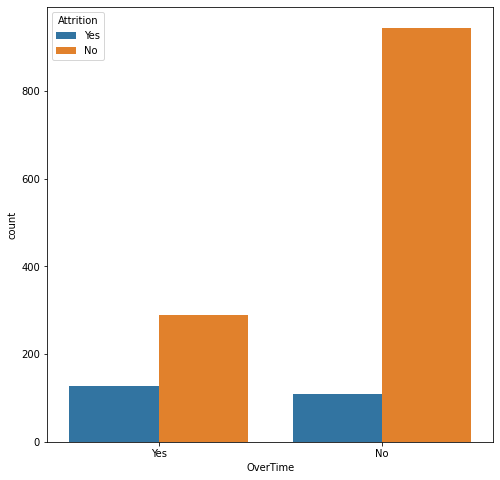

In [19]:
#Attrition based on if OverTime is compensated
plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'OverTime', hue = 'Attrition')

In [20]:
#PercentSalaryHike based Attrition
df_persh = df.loc[:,['PercentSalaryHike','Attrition']]
df_persh_graph = df_persh.pivot_table(index = 'PercentSalaryHike', columns=['Attrition'], aggfunc = len)
df_persh_graph.head(5)

Attrition,No,Yes
PercentSalaryHike,,
11,169,41
12,165,33
13,175,34
14,177,24
15,83,18


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

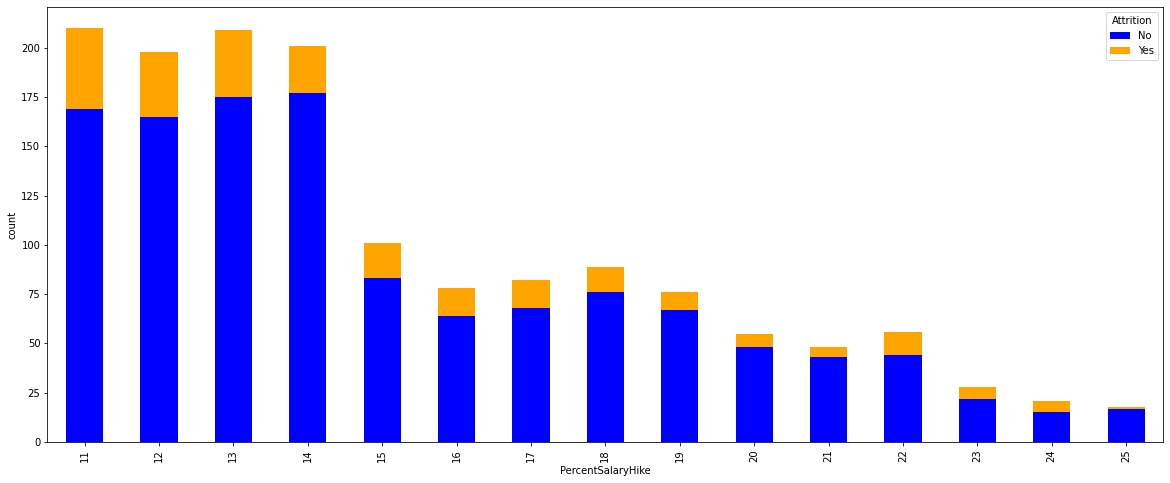

In [21]:
df_persh_graph.plot(kind = 'bar', stacked = True, color = ['blue','orange'], figsize = (20,8), ylabel = 'count')

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

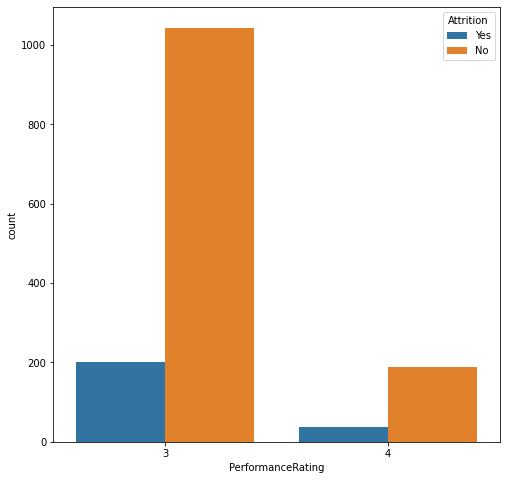

In [22]:
#Attrition based on PerformanceRating
plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'PerformanceRating', hue = 'Attrition')

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

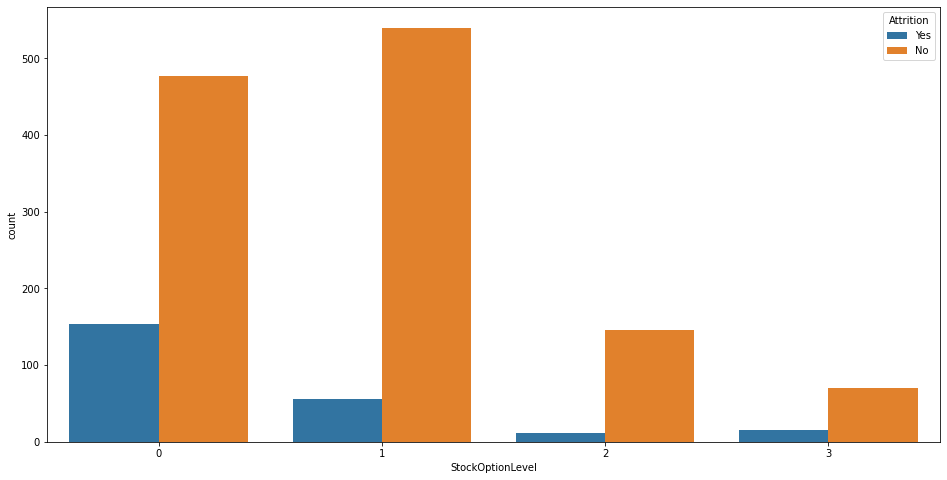

In [23]:
#RelationshipSatisfaction based attrition
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = 'StockOptionLevel', hue = 'Attrition')

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

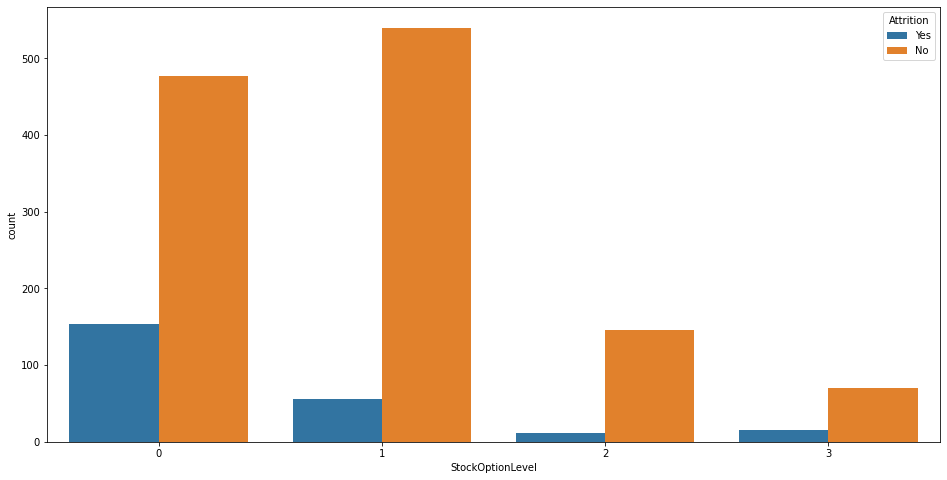

In [24]:
#Attrition based on StockOptionLevel
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = 'StockOptionLevel', hue = 'Attrition')

In [25]:
#Attrition based on TotalWorkingYears
df_woy = df.loc[:,['TotalWorkingYears','Attrition']]
df_woy_graph = df_woy.pivot_table(index = 'TotalWorkingYears', columns=['Attrition'], aggfunc = len)
df_woy_graph.head(5)

Attrition,No,Yes
TotalWorkingYears,,
0,6.0,5.0
1,41.0,40.0
2,22.0,9.0
3,33.0,9.0
4,51.0,12.0


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

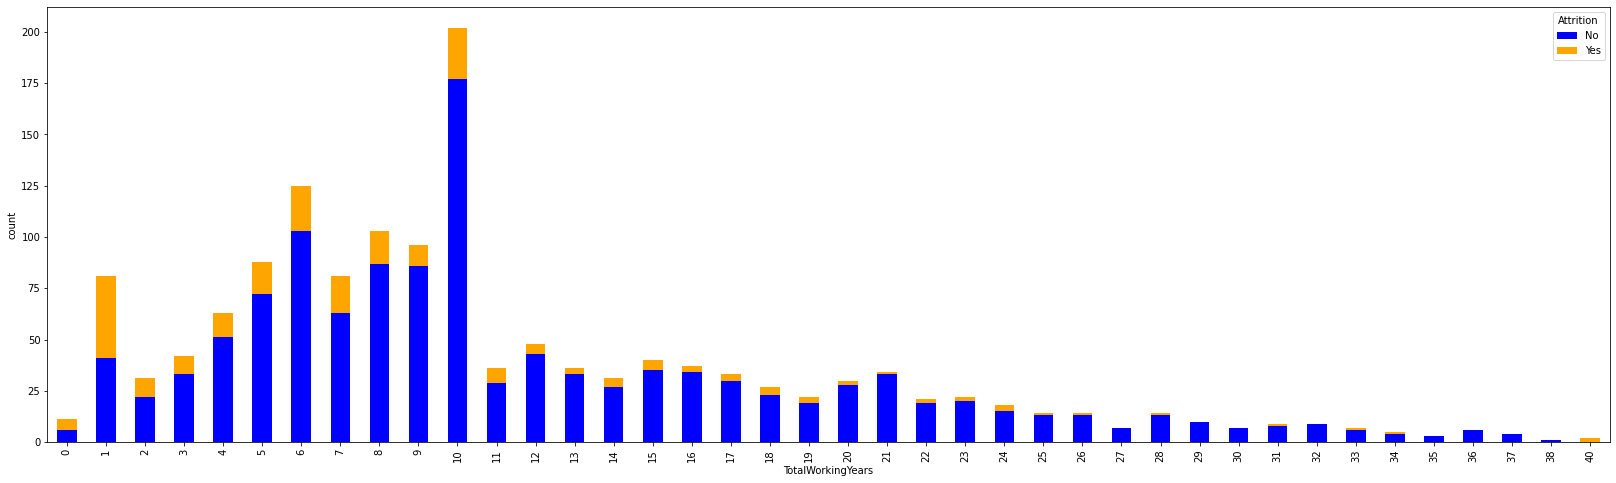

In [26]:
df_woy_graph.plot(kind = 'bar', stacked = True, color = ['blue','orange'], figsize = (28,8), ylabel = 'count')

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

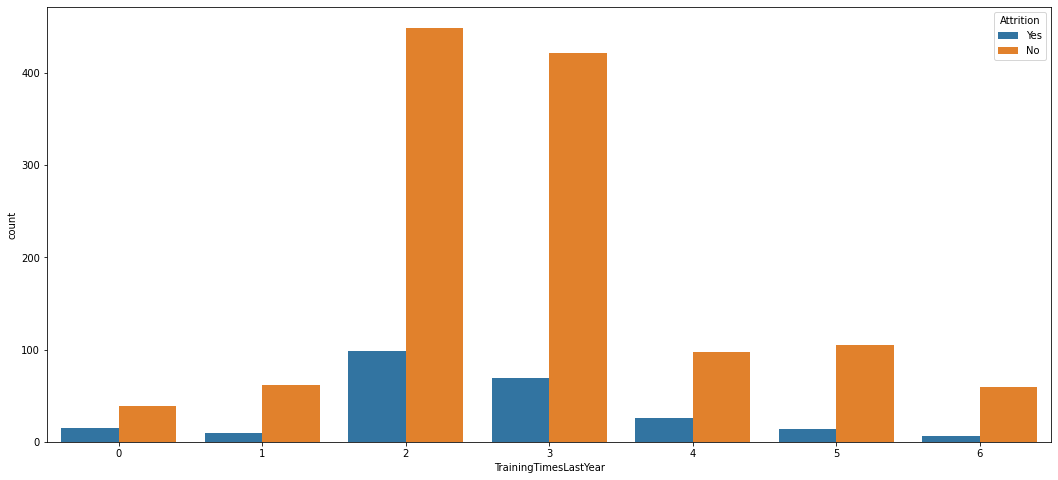

In [27]:
#Attrition based on TrainingTimesLastYear
plt.figure(figsize=(18,8))
sns.countplot(data = df, x = 'TrainingTimesLastYear', hue = 'Attrition')

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

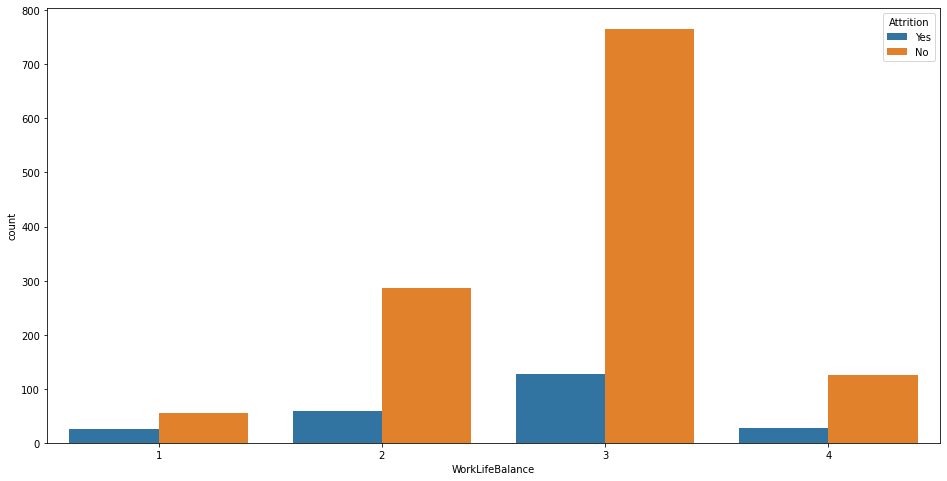

In [28]:
#Attrition based on WorkLifeBalance
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = 'WorkLifeBalance', hue = 'Attrition')

In [29]:
#Attrition based on YearsAtCompany
df_yatc = df.loc[:,['YearsAtCompany','Attrition']]
df_yatc_graph = df_yatc.pivot_table(index = 'YearsAtCompany', columns=['Attrition'], aggfunc = len)
df_yatc_graph.head(5)

Attrition,No,Yes
YearsAtCompany,,
0,28.0,16.0
1,112.0,59.0
2,100.0,27.0
3,108.0,20.0
4,91.0,19.0


<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

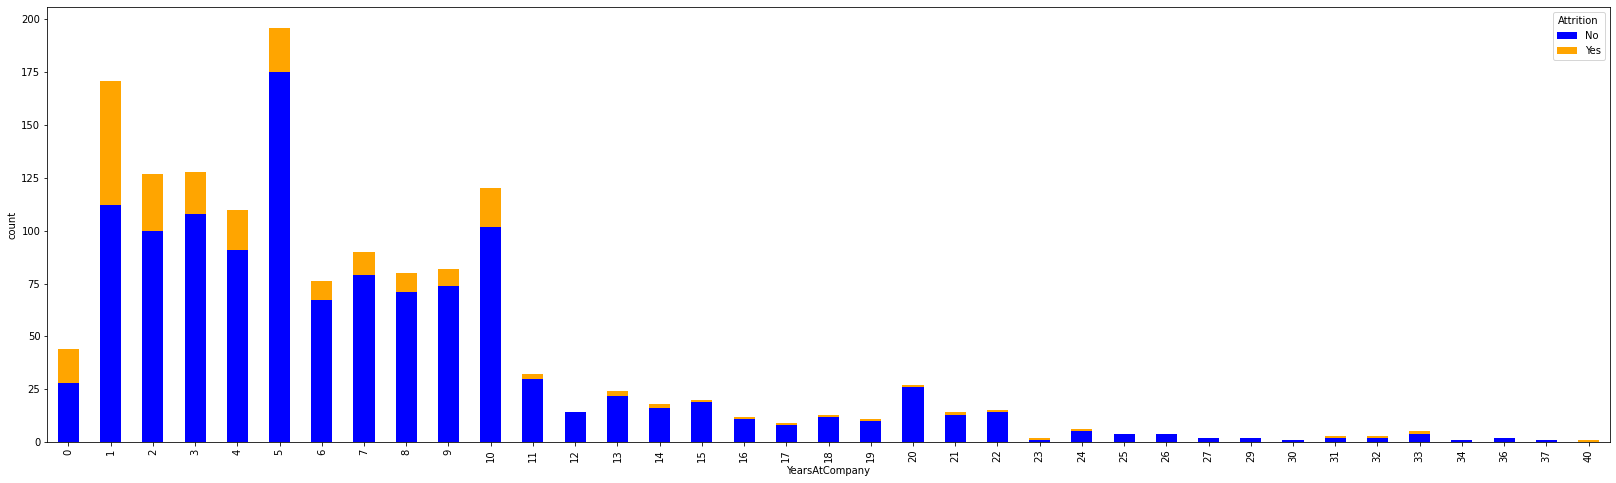

In [30]:
df_yatc_graph.plot(kind = 'bar', stacked = True, color = ['blue','orange'], figsize = (28,8), ylabel = 'count')

In [31]:
#Atrition based on YearsInCurrentRole
df_yincr = df.loc[:,['YearsInCurrentRole','Attrition']]
df_yincr_graph = df_yincr.pivot_table(index = 'YearsInCurrentRole', columns=['Attrition'], aggfunc = len)
df_yincr_graph.head(5)

Attrition,No,Yes
YearsInCurrentRole,,
0,171.0,73.0
1,46.0,11.0
2,304.0,68.0
3,119.0,16.0
4,89.0,15.0


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

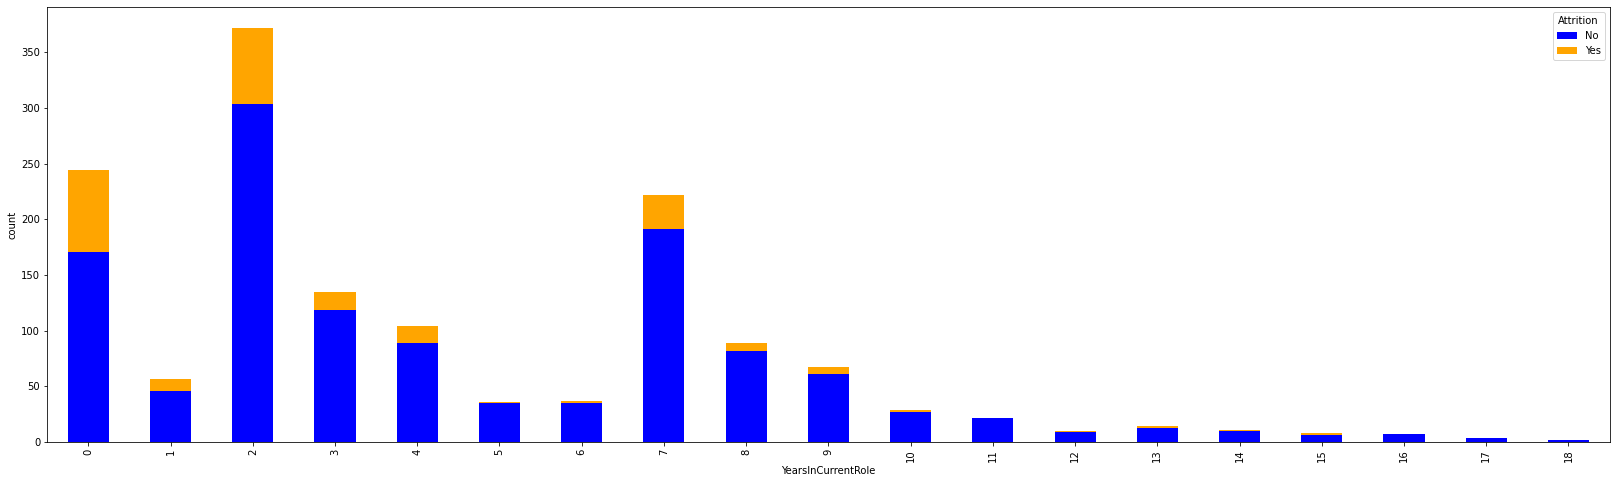

In [32]:
df_yincr_graph.plot(kind = 'bar', stacked = True, color = ['blue','orange'], figsize = (28,8), ylabel = 'count')

In [33]:
#Attrition based on YearsSinceLastPromotion
df_yslp = df.loc[:,['YearsSinceLastPromotion','Attrition']]
df_yslp_graph = df_yslp.pivot_table(index = 'YearsSinceLastPromotion', columns=['Attrition'], aggfunc = len)
df_yslp_graph.head(5)

Attrition,No,Yes
YearsSinceLastPromotion,,
0,471.0,110.0
1,308.0,49.0
2,132.0,27.0
3,43.0,9.0
4,56.0,5.0


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

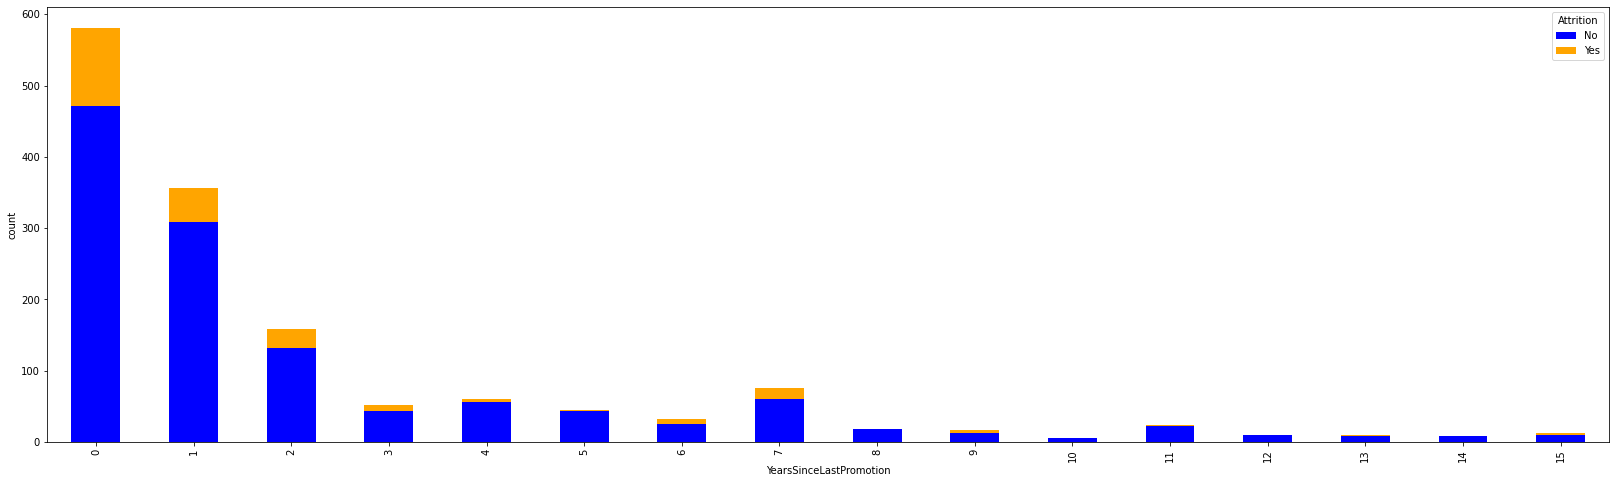

In [34]:
df_yslp_graph.plot(kind = 'bar', stacked = True, color = ['blue','orange'], figsize = (28,8), ylabel = 'count')

In [35]:
#Attrition based on YearsWithCurrManager
df_ywcm = df.loc[:,['YearsWithCurrManager','Attrition']]
df_ywcm_graph = df_ywcm.pivot_table(index = 'YearsWithCurrManager', columns=['Attrition'], aggfunc = len)
df_ywcm_graph.head(5)

Attrition,No,Yes
YearsWithCurrManager,,
0,178.0,85.0
1,65.0,11.0
2,294.0,50.0
3,123.0,19.0
4,87.0,11.0


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

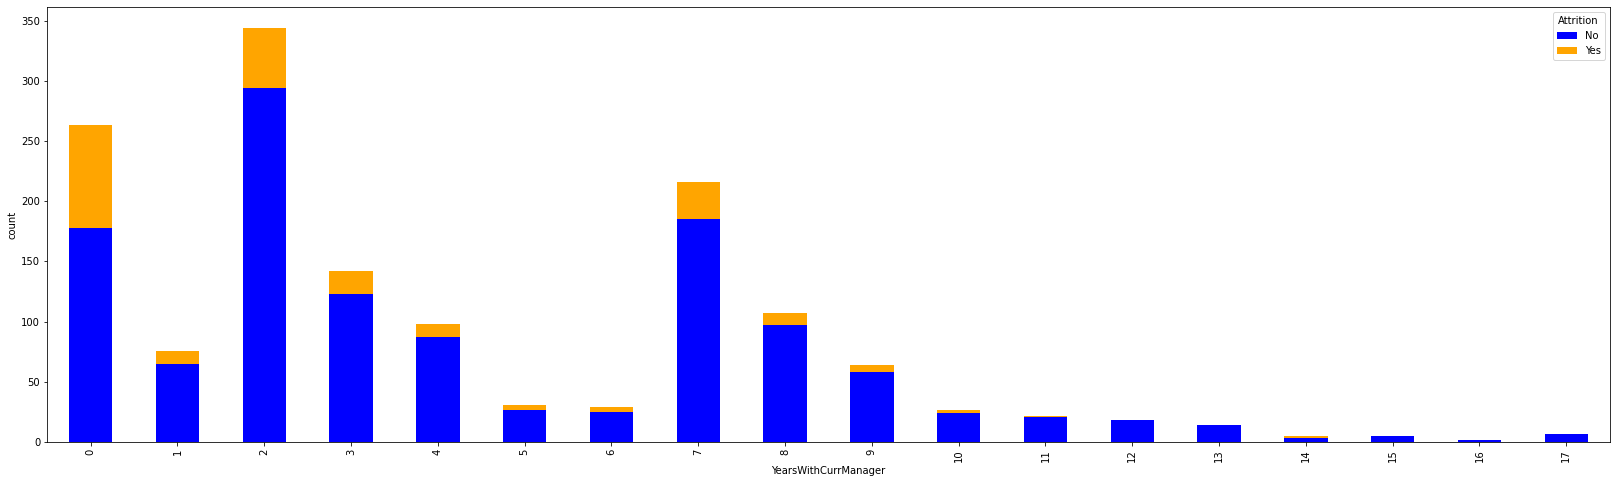

In [36]:
df_ywcm_graph.plot(kind = 'bar', stacked = True, color = ['blue','orange'], figsize = (28,8), ylabel = 'count')

<AxesSubplot:>

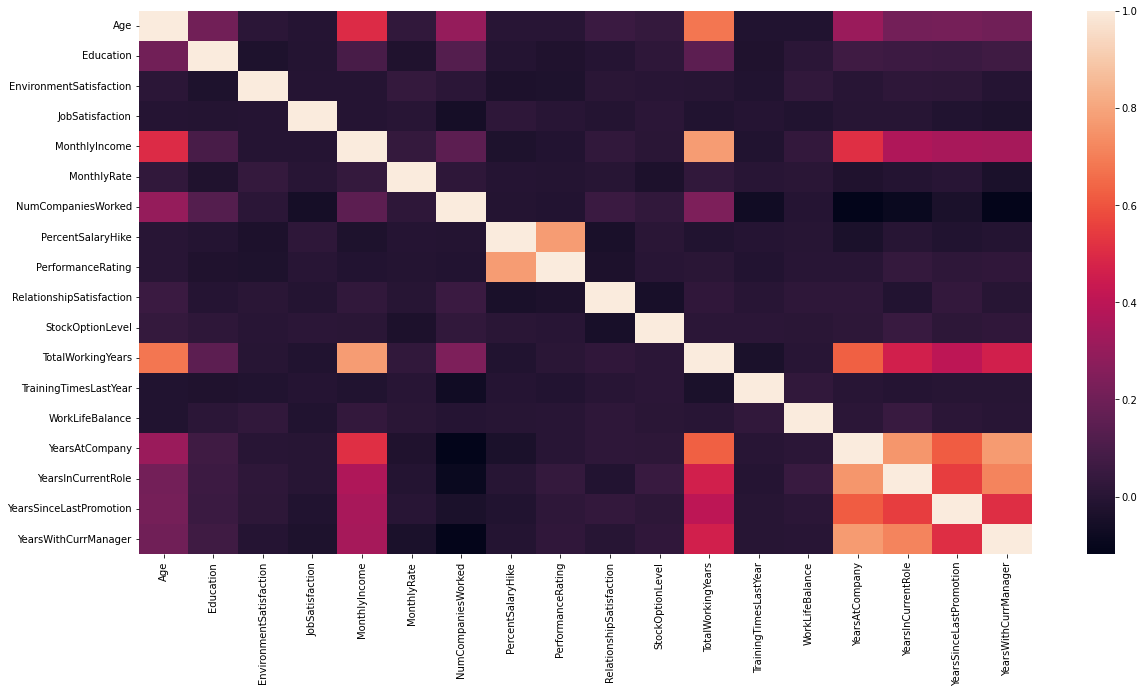

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

<font size = "12">**Building Optimal Model**</font>

In [38]:
#Encoding Department, Educationfield and Gender so that it becomes operable onto by the algorithm

#Department
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X = df['Department'].values
df['Department'] = encoder.fit_transform(X)
X = X.reshape(-1,1)

#EducationField
X = df['EducationField'].values
df['EducationField'] = encoder.fit_transform(X)
X = X.reshape(-1,1)

#Gender
X = df['Gender'].values
df['Gender'] = encoder.fit_transform(X)
X = X.reshape(-1,1)

#Attrition
X = df['Attrition'].values
df['Attrition'] = encoder.fit_transform(X)
X = X.reshape(-1,1)

In [39]:
#JobSatisfaction, EnvironmentSatisfaction, OverTime are not considered in 'x' as they had little to no effect towards attrition as seen in their respective graphs.
x = df[['Age', 'Department', 'Education', 'EducationField', 'Gender', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = df[['Attrition']]
x

,Age,Department,Education,EducationField,Gender,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,0,8,11,3,1,0,8,0,1,6,4,0,5
1,49,1,1,1,1,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,4,1,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1,4,1,0,1,11,3,3,0,8,3,3,8,7,3,0
4,27,1,1,3,1,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,2,3,1,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,1,1,3,1,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,1,3,1,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,2,3,3,1,2,14,3,4,0,17,3,2,9,6,0,8


In [40]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [41]:
#Splittiing the x and y into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

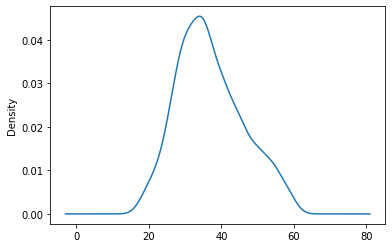

In [42]:
normal = x['Age']
ax = normal.plot.kde()

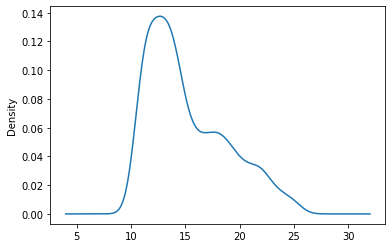

In [43]:
normal = x['PercentSalaryHike']
ax = normal.plot.kde()

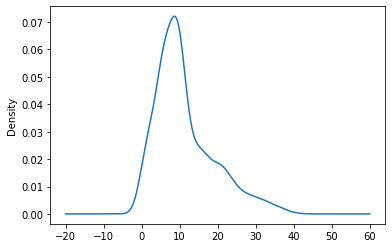

In [44]:
normal = x['TotalWorkingYears']
ax = normal.plot.kde()

<font size = "4">***Since most of the columns in the DataFrame are negatively skewed we cannot efficiently use StandarsScalar or MinMaxScalar***</font><br>
<font size = "4">***As most of the values in the DataFrame are in the range of 0-9 we need to scale all the other columns to be in that range***</font>
<font size = "4">***The columns that need to be scaled are:-***</font><br>
* <font size = "4">***Age***</font>
* <font size = "4">***PercentSalaryHike***</font>
* <font size = "4">***TotalWorkingYears***</font>
* <font size = "4">***YearsAtCompan***</font>
* <font size = "4">***YearsInCurrentRole***</font>
* <font size = "4">***YearsSinceLastPromotion***</font>
* <font size = "4">***YearsWithCurrManager***</font>

In [45]:
#Using RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

<font size = "5">**Since we're tying to do binary classification we will use Logistic Regression and Support Vector Machine and compare their accuracies**</font>

accuracy= 82.6086956521739 %
              precision    recall  f1-score   support

         Yes       0.83      1.00      0.90       302
          No       1.00      0.03      0.06        66

    accuracy                           0.83       368
   macro avg       0.91      0.52      0.48       368
weighted avg       0.86      0.83      0.75       368



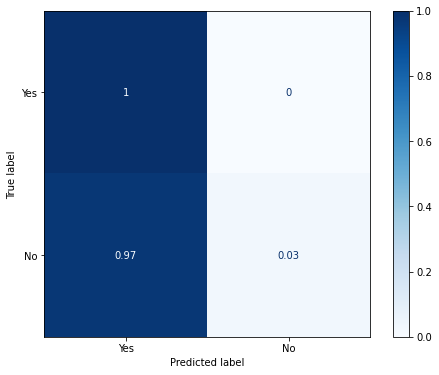

In [46]:
#Using logistic regression to predict Attretion
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
warnings.filterwarnings('ignore')
lgr = LogisticRegression()
lgr.fit(X_train_sc , Y_train)

prediction = lgr.predict(X_test_sc)

from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test,prediction)*100
print("accuracy=",accuracy,"%")

target_names = ['Yes','No']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))


cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

In [47]:
# Using Support Vector MAchine to predict Attretion
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
svm = SVC()
svm.fit(X_train_sc , Y_train)

prediction = svm.predict(X_test_sc)

accuracy = accuracy_score(Y_test,prediction)*100
print(accuracy,"%")

82.06521739130434 %


<font size = "5"> ***We will use Logictic Regression as it gives a higher accuracy***</font>